# Plots For Data

### 0. Pre Processing For Delhi.csv

In [1]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import csv
import datetime as dt

plt.rcParams["figure.figsize"] = (50,10)

col_names = {} #col index to name
columns = {} # col name to list
with open("./data/Delhi.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0

    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            i=0
            for s in row:
                col_names[i] = s
                columns[s]=[]
                i += 1
            line_count += 1
        else:
            i=0
            for s in row:
                columns[col_names[i]].append(s if i == 0 else float(s))
                i += 1
            line_count += 1
    print(f'Processed {line_count} lines.')

columns["date"] = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in columns["date"]]

Column names are date, Max Temp (c), Min Temp (c), Avg Temp (c), Snow (cm), Sun Time (Hours), UV Index, Total Precipitation (MM), Avg Pressure (P), Avg Humidity (%), Avg Cloud Cover, Avg Resultant Wind vector [E](km/h), Avg Resultant Wind vector [N](km/h)
Processed 4654 lines.


### 1. Date vs Avg Temp

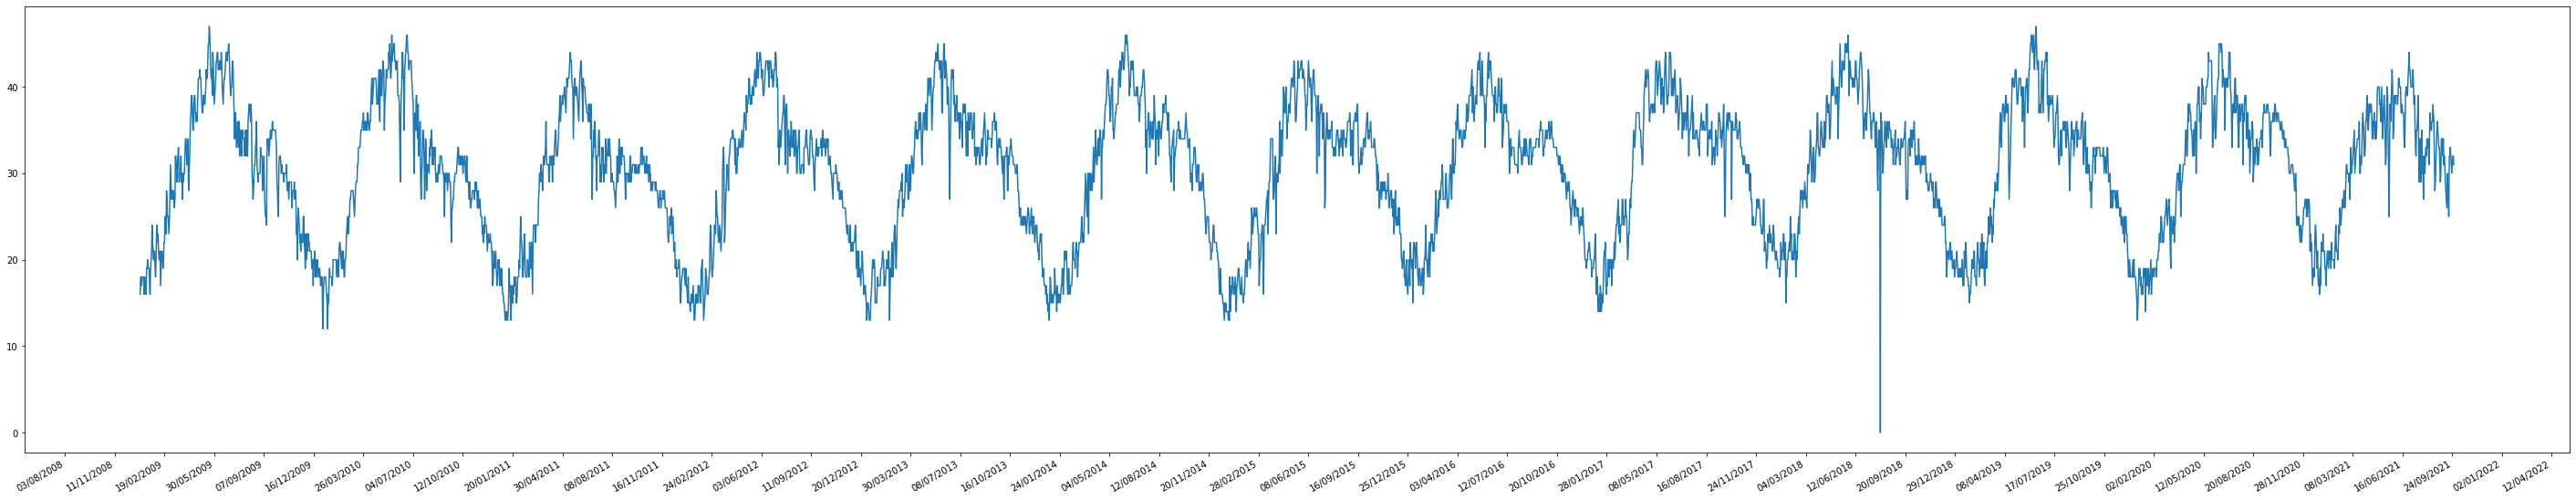

In [2]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Avg Temp (c)"])
plt.gcf().autofmt_xdate()

### 2. Date vs UV

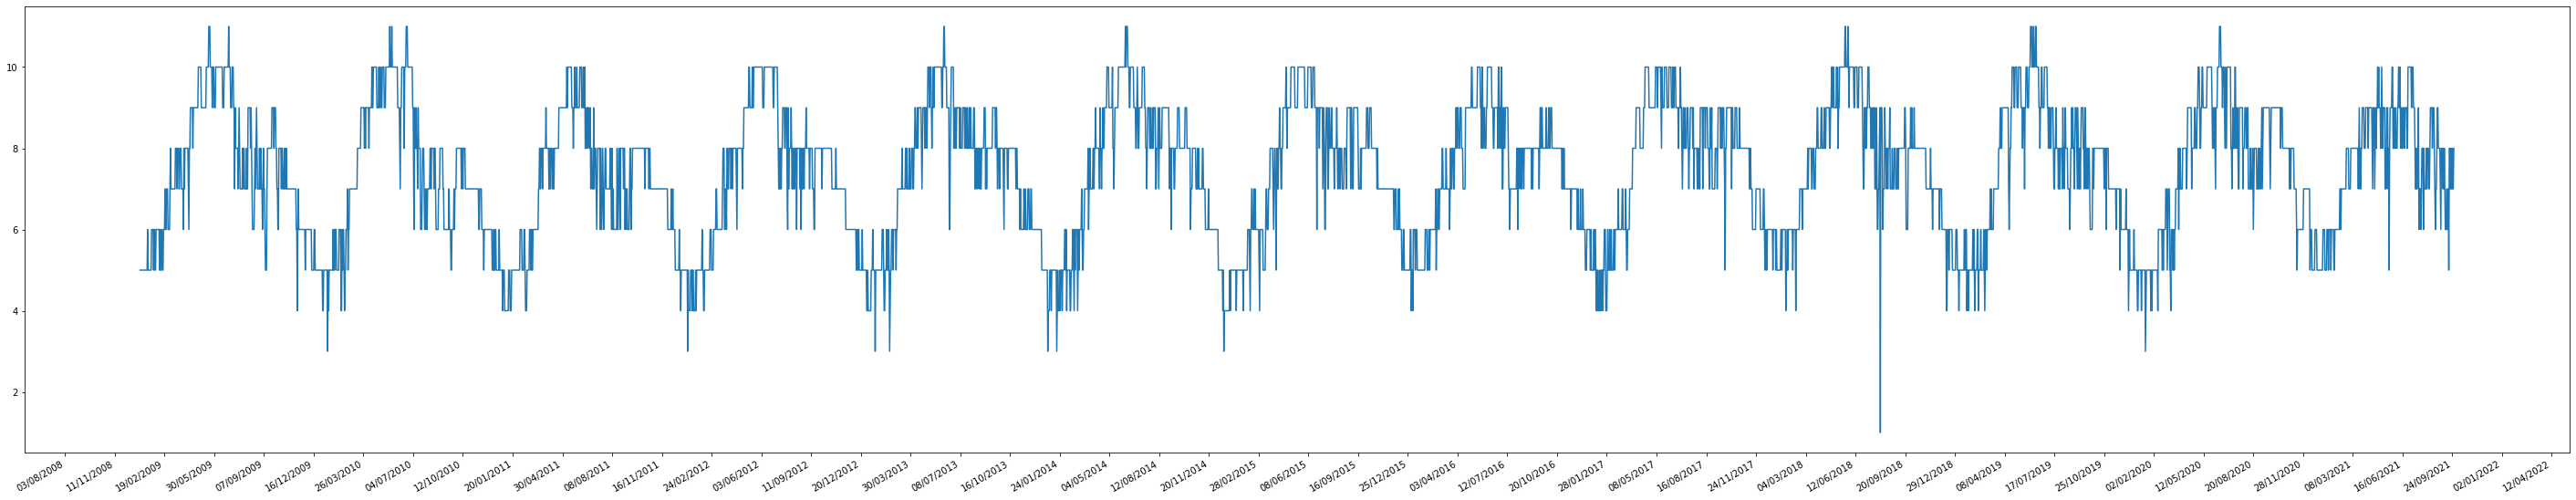

In [3]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["UV Index"])
plt.gcf().autofmt_xdate()

### 3. Date vs Total Percip

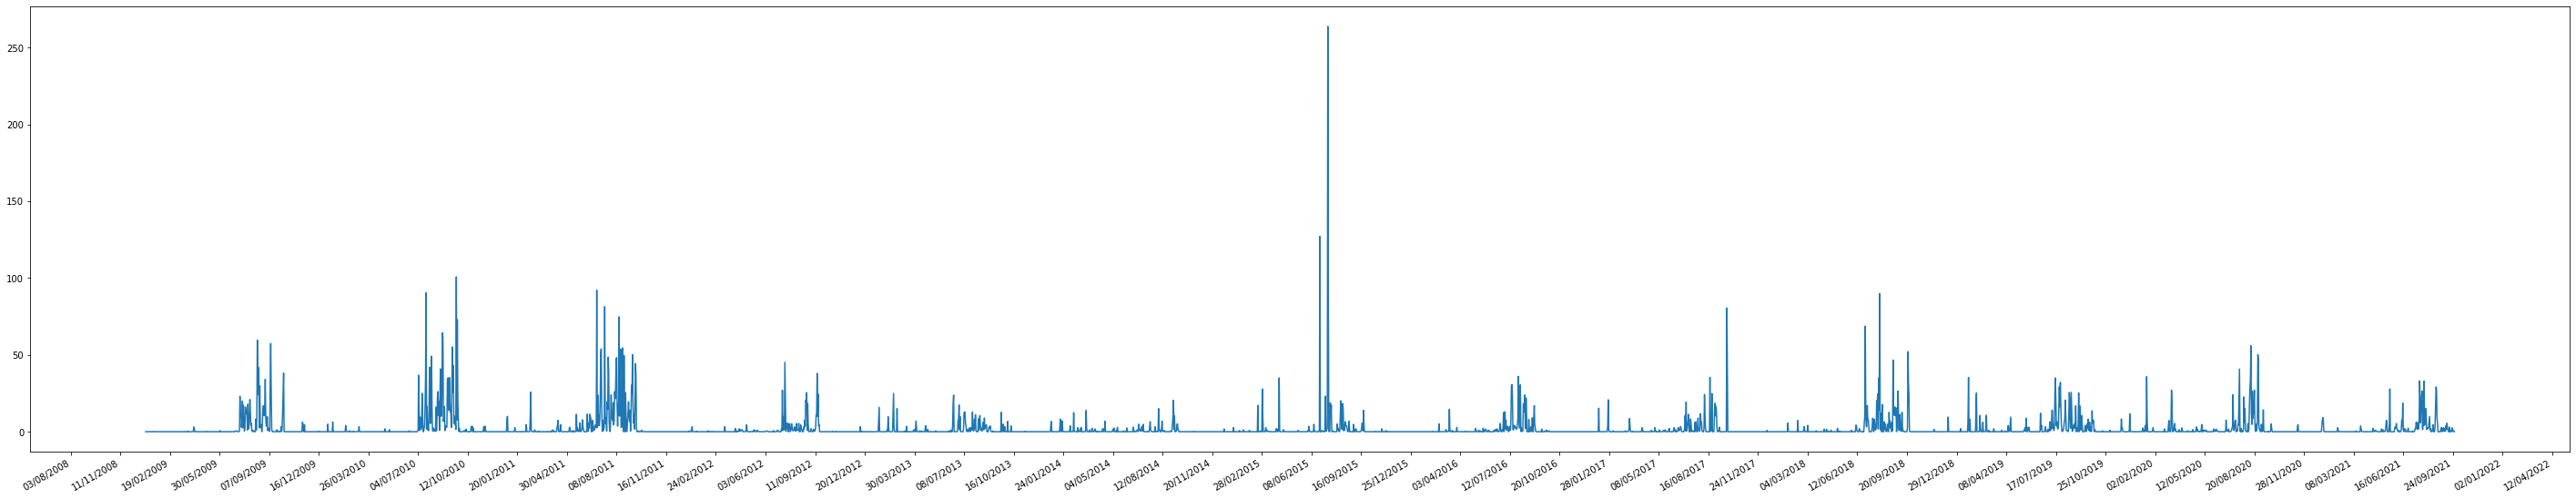

In [4]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Total Precipitation (MM)"])
plt.gcf().autofmt_xdate()

### 4. Date vs Pressure

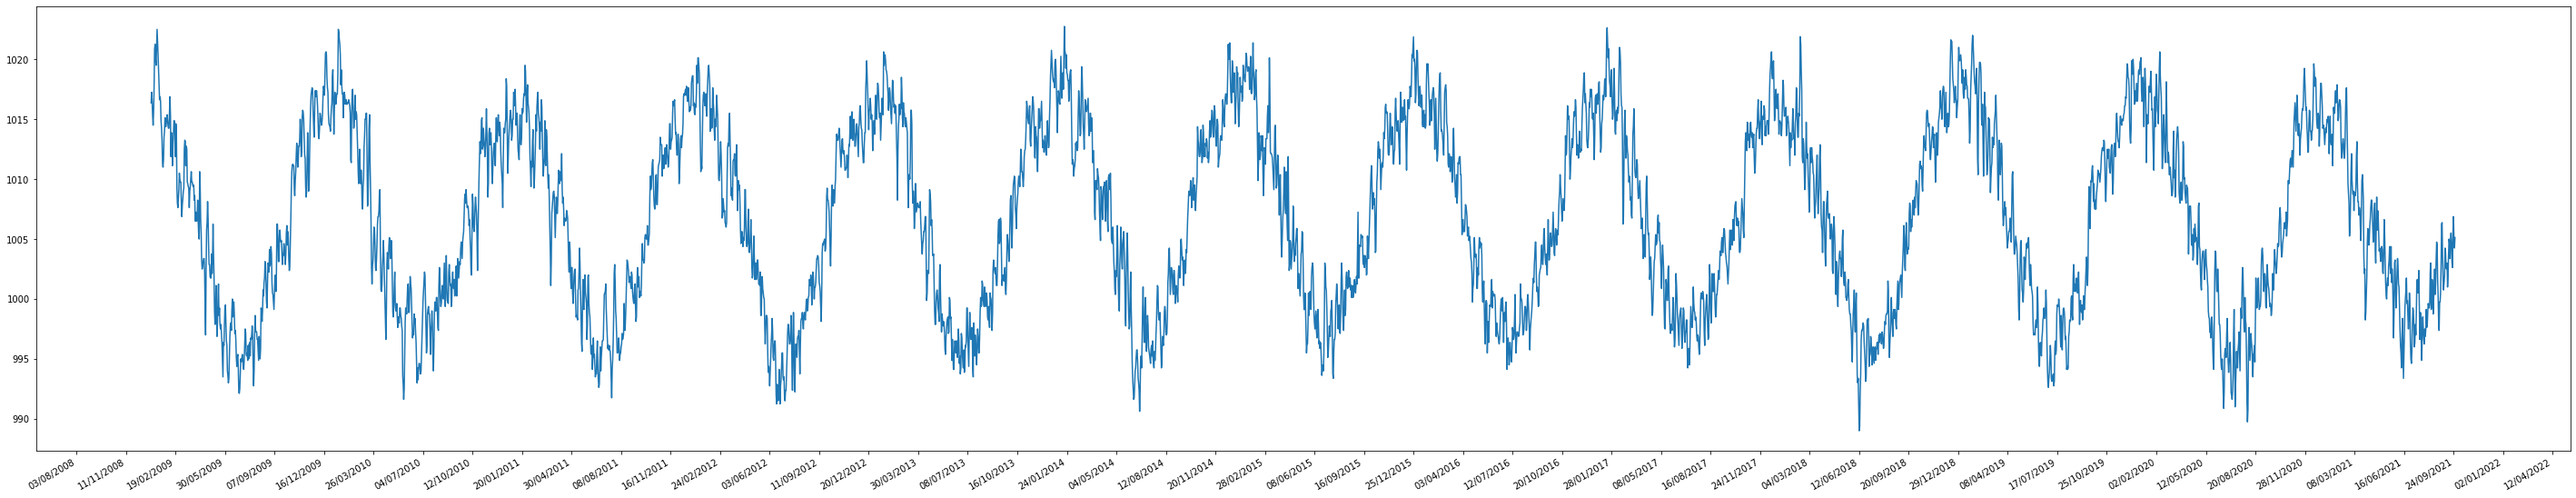

In [5]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Avg Pressure (P)"])
plt.gcf().autofmt_xdate()

### 5. Date vs Humidity

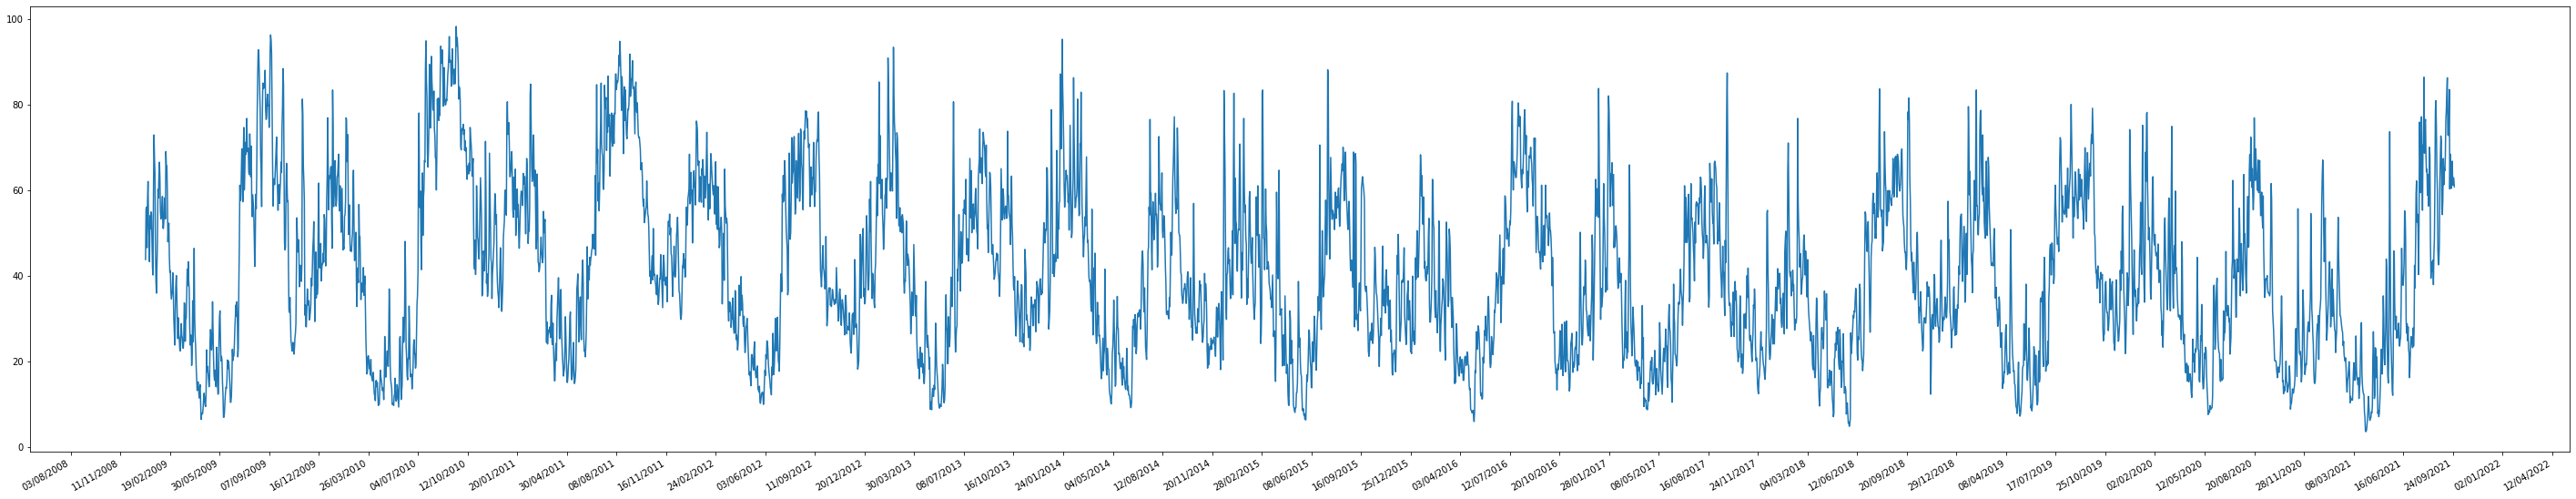

In [6]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Avg Humidity (%)"])
plt.gcf().autofmt_xdate()


### 6. Date vs Avg Cloud Cover

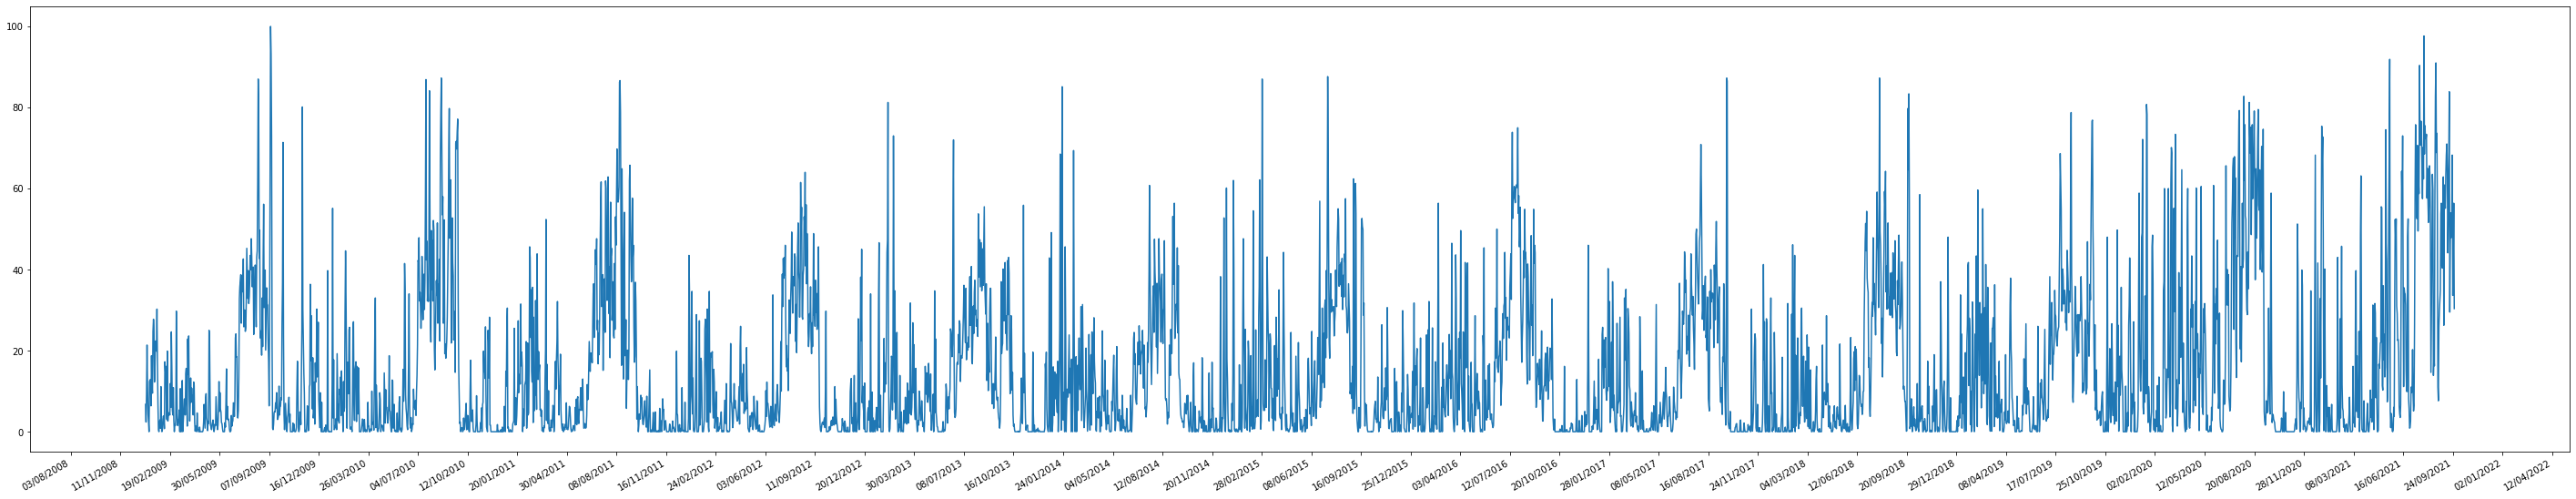

In [7]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Avg Cloud Cover"])
plt.gcf().autofmt_xdate()

### 7. Date vs Avg resultant wind vector [E]

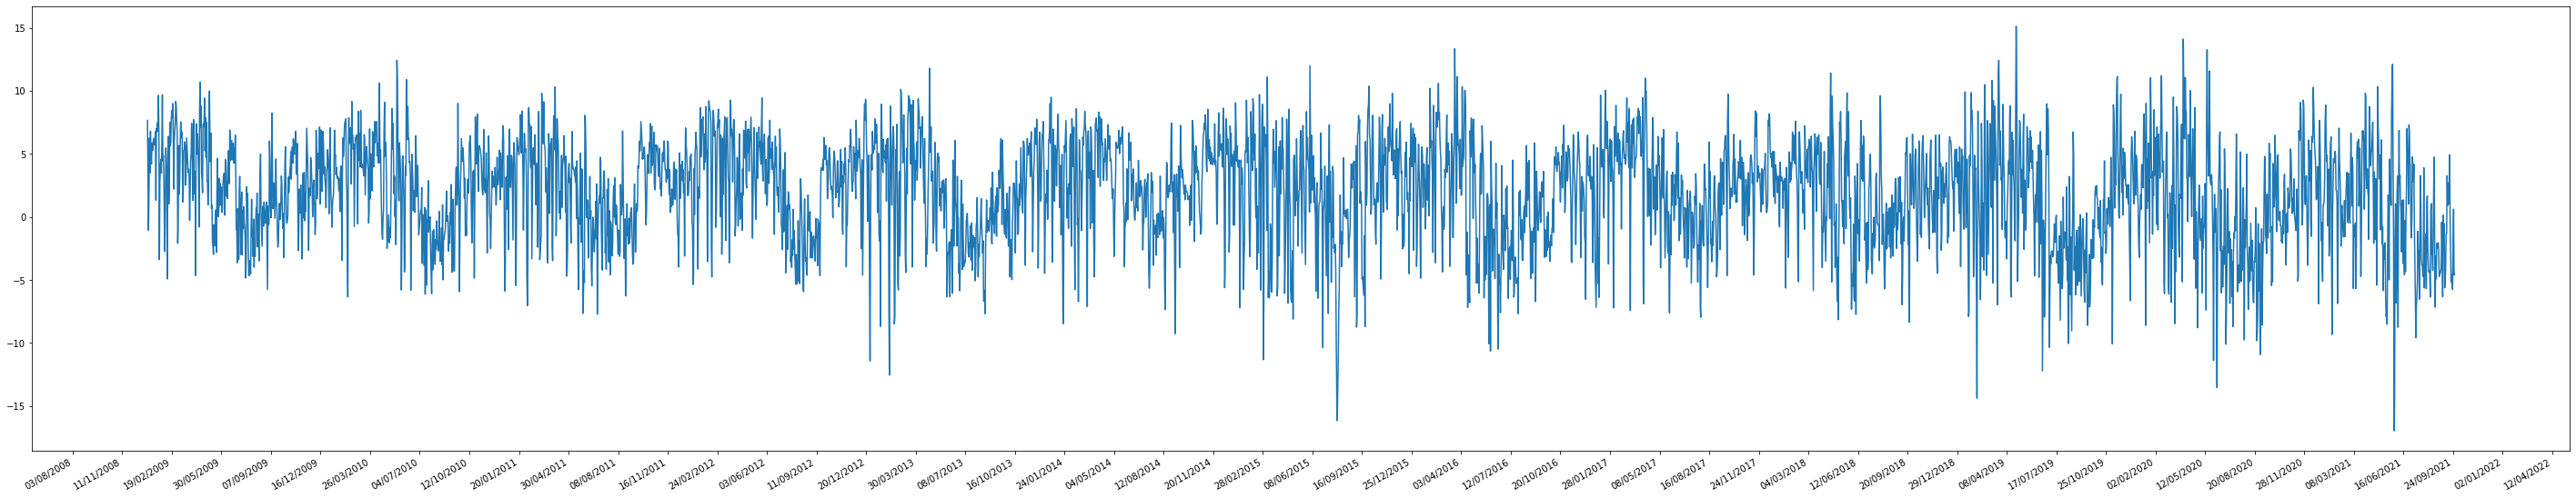

In [8]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Avg Resultant Wind vector [E](km/h)"])
plt.gcf().autofmt_xdate()

### 8. Date vs Avg resultant wind Dir [N]

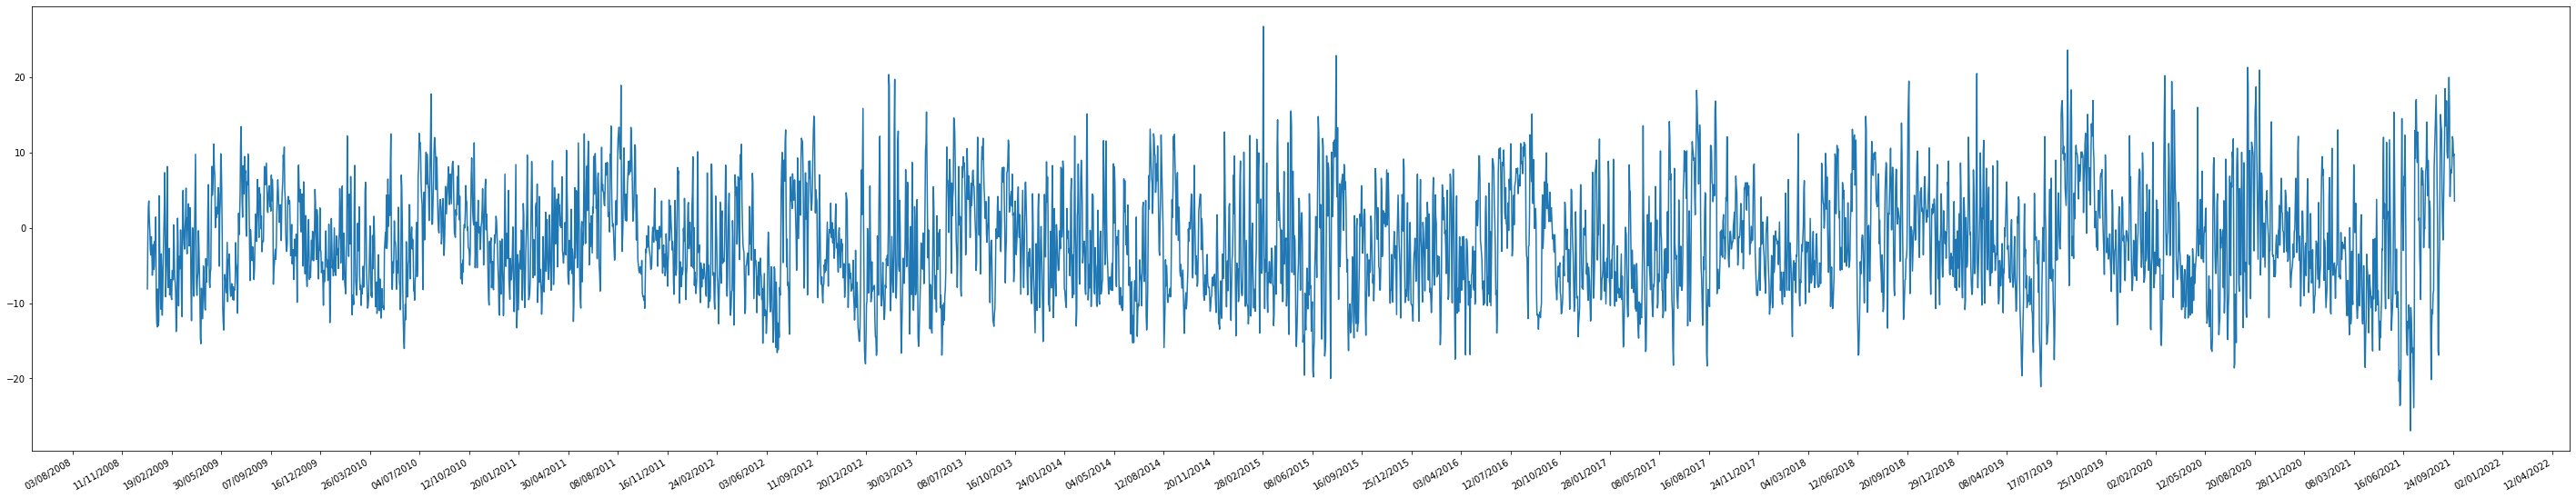

In [9]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(columns["date"],columns["Avg Resultant Wind vector [N](km/h)"])
plt.gcf().autofmt_xdate()

## Importing pandas and numpy

In [10]:
import pandas as pd
import numpy as np

## Importing Data

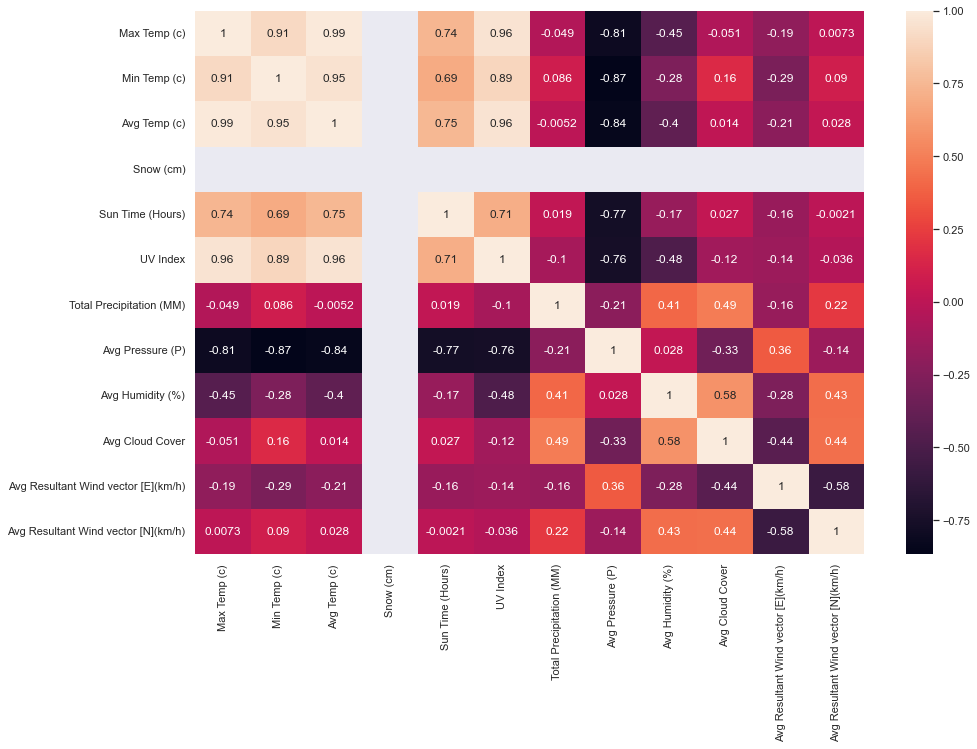

In [11]:
import seaborn as sns
sns.set_theme()
plt.rcParams["figure.figsize"] = (15,10)

files = ["Delhi",
         "East_20", "East_100", "East_500",
         "North_20", "North_100", "North_500",
         "South_20", "South_100", "South_500",
         "West_20", "West_100", "West_500"]
#List containing the data for different cities
data = []

for i in range(len(files)):
    data_ = pd.read_csv("data/" + files[i] + ".csv")

    if i != 0:
        data_.pop("date")
    else:
        rs = np.random.RandomState(0)
        corr = data_.corr()
        sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
                    annot=True)
    data.append(data_)

## Importing data manipulation

In [12]:
class PreProcessor:
#days denote size of the window
    def __init__(self, data, days, attr):
        # X and Y data
        self.X = np.zeros((data[0].shape[0] - days, ((data[0].shape[1] - 1)*len(data))*days))
        self.Y = np.zeros((self.X.shape[0], 1))
        
        #Concatination of cities data;
        data_cities = data[0]
        for i_ in range(1, len(data)):
            data_cities = pd.concat([data_cities, data[i_]], axis = 1)

        data_cities = data_cities.to_numpy()
        #Data filing
        for i_ in range(0, self.X.shape[0]):
            for offset in range(0, days):
                index = (offset * (data_cities.shape[1] - 1))
                self.X[i_, index: index + data_cities.shape[1] - 1] = data_cities[i_ + offset, 1:]
            self.Y[i_, 0] = data[0][attr][i_+days]
        
        # self.standardize_data()
    
    #Standardizing the data
    def standardize_data(self):
        mean = np.mean(self.X, axis = 0)
        std = np.std(self.X, axis = 0)
        std[std == 0] = 1
        self.X = self.X - mean
        self.X = self.X / std
        
    #Splitting the data
    #def split(self):

def coeff_printer(file_order, given_model, data, days, consider_date=False):
    index = 0
    if consider_date:
        print("year:", given_model.coef_[index])
        index += 1
        print("year_day:", given_model.coef_[index])
        index += 1

    for day in range(days, 0, -1):
        for file in file_order:
            for (attr, val) in data[0].iteritems():
                if attr != "date":
                    str_coef = f"{round(given_model.coef_[index], 4)}"
                    print(f"Before: {str(day):4s} | file: {file:10s} | attr: {attr:40s}",
                          f":{str_coef:>10s}")
                    index += 1

## Importing Sklearn

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge

regression_attr = "Max Temp (c)"

## Linear Regression

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


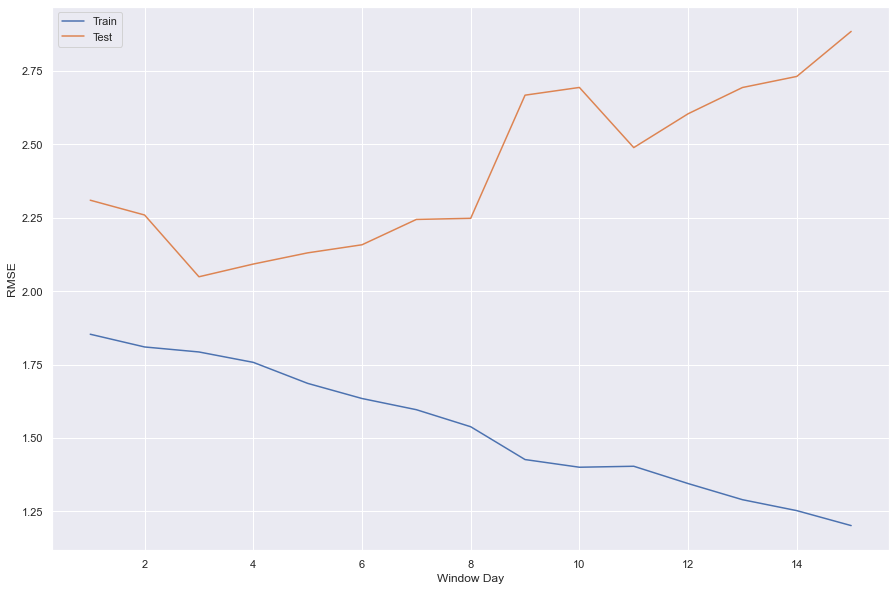

In [14]:
train_rmse_LR = []
test_rmse_LR = []
days = []
models_LR = []
for i in range(1,16):
    obj = PreProcessor(data, i, regression_attr)
    x_train, x_test, y_train, y_test = train_test_split(obj.X, obj.Y, test_size=0.2, random_state=1)
    model = LinearRegression().fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    models_LR.append(model)
    print(i)
    days.append(i)
    test_rmse_LR.append(mean_squared_error(y_test, y_pred_test)**(1/2))
    train_rmse_LR.append(mean_squared_error(y_train, y_pred_train)**(1/2))
    

plt.plot(days, train_rmse_LR, label = "Train")
plt.plot(days, test_rmse_LR, label = "Test")
plt.ylabel("RMSE")
plt.xlabel("Window Day")
plt.legend()
plt.show()

## Lasso

C:\Users\etash\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.098e+01, tolerance: 2.034e+01
  model = cd_fast.enet_coordinate_descent(


1


C:\Users\etash\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.608e+01, tolerance: 2.018e+01
  model = cd_fast.enet_coordinate_descent(


2
3
4
5
6
7
8
9
10
11
12
13
14
15


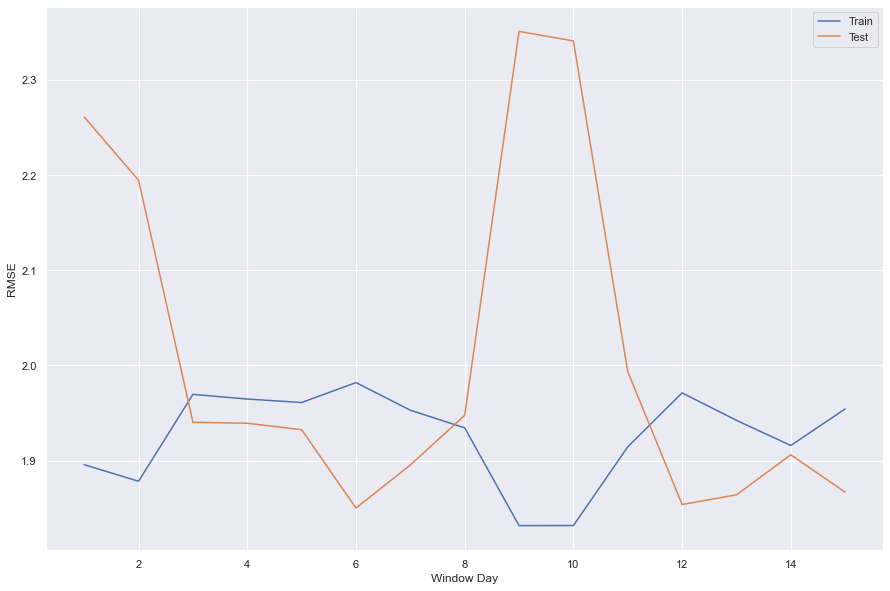

In [15]:
train_rmse_LA = []
test_rmse_LA = []
days = []
models_LA = []
for i in range(1,16):
    obj = PreProcessor(data, i, regression_attr)
    x_train, x_test, y_train, y_test = train_test_split(obj.X, obj.Y, test_size=0.2, random_state=1)
    model = LassoCV(cv=5).fit(x_train, np.ravel(y_train))
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    models_LA.append(model)
    print(i)
    days.append(i)
    test_rmse_LA.append(mean_squared_error(y_test, y_pred_test)**(1/2))
    train_rmse_LA.append(mean_squared_error(y_train, y_pred_train)**(1/2))


plt.plot(days, train_rmse_LA, label = "Train")
plt.plot(days, test_rmse_LA, label = "Test")
plt.ylabel("RMSE")
plt.xlabel("Window Day")
plt.legend()
plt.show()

## Ridge

1
2
3
4
5
6
7


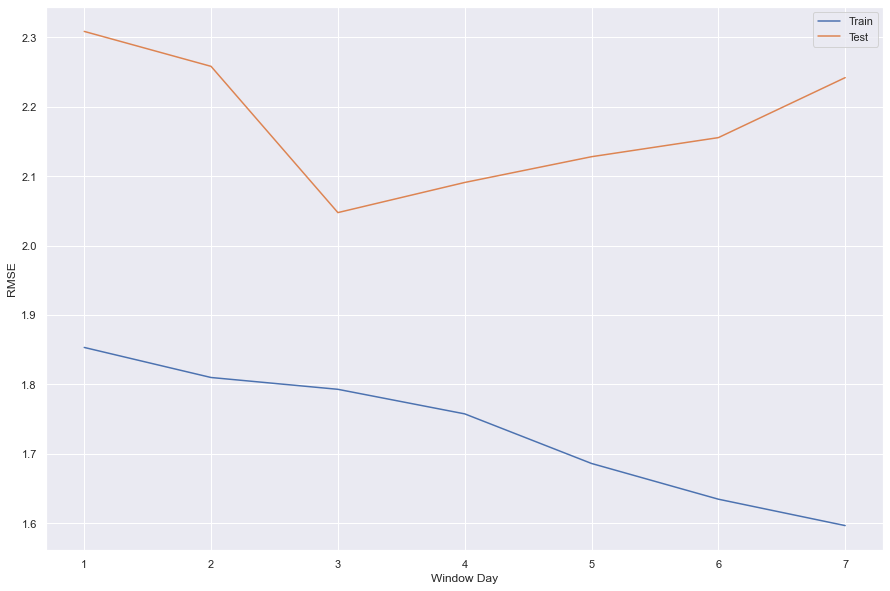

In [16]:
train_rmse_R = []
test_rmse_R = []
days = []
models_R = []
for i in range(1,8):
    obj = PreProcessor(data, i, regression_attr)
    x_train, x_test, y_train, y_test = train_test_split(obj.X, obj.Y, test_size=0.2, random_state=1)
    model = Ridge().fit(x_train, np.ravel(y_train))
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    models_R.append(model)
    print(i)
    days.append(i)
    test_rmse_R.append(mean_squared_error(y_test, y_pred_test)**(1/2))
    train_rmse_R.append(mean_squared_error(y_train, y_pred_train)**(1/2))


plt.plot(days, train_rmse_R, label = "Train")
plt.plot(days, test_rmse_R, label = "Test")
plt.ylabel("RMSE")
plt.xlabel("Window Day")
plt.legend()
plt.show()

## MLP

1
2
3
4
5
6
7


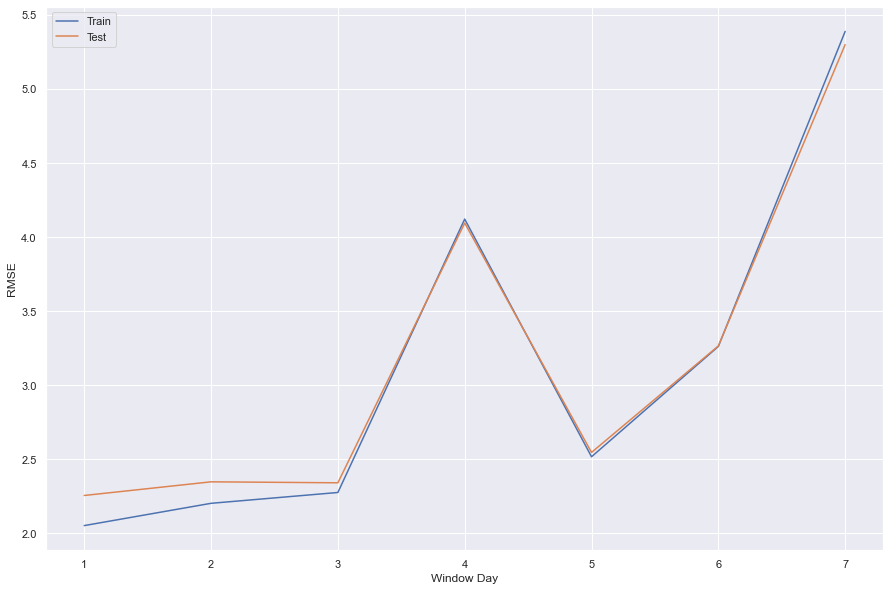

In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

train_rmse_MLP = []
test_rmse_MLP = []
days = []
models_MLP = []
for i in range(1,8):
    obj = PreProcessor(data, i, regression_attr)
    x_train, x_test, y_train, y_test = train_test_split(obj.X, obj.Y, test_size=0.2, random_state=1)
    model = MLPRegressor(random_state=1, max_iter=500).fit(x_train, np.ravel(y_train))
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    models_MLP.append(model)
    print(i)
    days.append(i)
    test_rmse_MLP.append(mean_squared_error(y_test, y_pred_test)**(1/2))
    train_rmse_MLP.append(mean_squared_error(y_train, y_pred_train)**(1/2))

plt.plot(days, train_rmse_MLP, label = "Train")
plt.plot(days, test_rmse_MLP, label = "Test")
plt.ylabel("RMSE")
plt.xlabel("Window Day")
plt.legend()
plt.show()

In [18]:
coeff_printer(files, models_LA[0], data, days=1,consider_date=False)

Before: 1    | file: Delhi      | attr: Max Temp (c)                             :       0.0
Before: 1    | file: Delhi      | attr: Min Temp (c)                             :      -0.0
Before: 1    | file: Delhi      | attr: Avg Temp (c)                             :    0.0027
Before: 1    | file: Delhi      | attr: Snow (cm)                                :       0.0
Before: 1    | file: Delhi      | attr: Sun Time (Hours)                         :       0.0
Before: 1    | file: Delhi      | attr: UV Index                                 :       0.0
Before: 1    | file: Delhi      | attr: Total Precipitation (MM)                 :      -0.0
Before: 1    | file: Delhi      | attr: Avg Pressure (P)                         :      -0.0
Before: 1    | file: Delhi      | attr: Avg Humidity (%)                         :      -0.0
Before: 1    | file: Delhi      | attr: Avg Cloud Cover                          :    0.0249
Before: 1    | file: Delhi      | attr: Avg Resultant Wind vector [E](